In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

### Analyses
- Nucleotide distribution at branchpoints ('genomic_bp_nt')
- Distance distribution of branchpoints to 3' splice sites ('bp_dist_to_threep')
### Other potential points of analysis
- PCA
- Visualize 5' splice site, 3' splice site, and bp on each chromosome
- Nucleotide and distance distribution, correlation to gene type

In [2]:
reads_df = pd.read_csv('/Users/yinzheng/Documents/GitHub/lariat_mapping_test/larmap_out/demo_mapped_reads_250k.csv', header=0, delimiter=',', dtype='str')

In [3]:
reads_df

,gene,gene_ensembl_id,gene_type,read_id,read_seq,chrom,strand,fivep_pos,threep_pos,bp_pos,read_bp_nt,genomic_bp_nt,genomic_bp_context,bp_dist_to_threep,total_mapped_reads
0,Rabgap1l,ENSMUSG00000026721.17,protein_coding,A00265:1116:HCKJ2DSX5:1:1110:28266:22106,GTTCAGTGTGGCCACAGAATCAGATGACCCACTAACCTTCTGGAAC...,chr1,-,160568452,160568369,160568396,C,C,TGAACAGTGA,-27,165876
1,Dpp7,ENSMUSG00000026958.14,protein_coding,A00265:1116:HCKJ2DSX5:1:1105:4761:13401,CTGAGGAAACTGCTGGCAAATGTGAAGGGCAAGAATGAATGCCCAA...,chr2,-,25244751,25244646,25244674,G,G,CTCAGCCTTT,-28,165876
2,Phc3,ENSMUSG00000037652.16,protein_coding,A00265:1116:HCKJ2DSX5:1:1109:15953:10645,GTGGAAGATTCAGCTGTGCGGTGGACTGTACCTGATCAGCAGCAGC...,chr3,-,30990873,30990748,30990828,C,T,TCCATCCCAT,-80,165876
3,Szt2,ENSMUSG00000033253.19,protein_coding,A00265:1116:HCKJ2DSX5:1:1110:25527:22842,GCGTCCCAGGGTTCTGATGGCCCCGAGGTAGGTTTCAGAAGGTTGG...,chr4,-,118247253,118247066,118247201,C,C,GACGCTTGCC,-135,165876
4,Atraid,ENSMUSG00000013622.16,protein_coding,A00265:1116:HCKJ2DSX5:1:1115:19759:6778,GCCATCACCATATTTATCTTTTGGGCAGGAAAATATATAACCACTT...,chr5,+,31209612,31209805,31209659,C,G,ATGGGAAATA,-146,165876
5,Myo1h,ENSMUSG00000066952.12,protein_coding,A00265:1116:HCKJ2DSX5:1:1118:24623:13197,GTTCAGCTTAGGGAAGTGAGCTCTTGTGGCCGGAAGCTGTAGTTAC...,chr5,+,114499174,114499260,114499219,C,C,TGAACCCTGC,-41,165876
6,Srebf2,ENSMUSG00000022463.9,protein_coding,A00265:1116:HCKJ2DSX5:1:1118:3079:29183,GCCTCTGCCACTGCTGTTGTTGCCACTGCCACCATTGCTGCCACCT...,chr15,+,82054019,82054139,82054062,C,C,GAGGCAACAA,-77,165876
7,Gm50100,ENSMUSG00000117696.3,lncRNA,A00265:1116:HCKJ2DSX5:1:1108:25527:34741,GTTGTGAATAAGAGGTTATCTTCCCGTCACATGCCCACCCCTTCCT...,chr19,-,56735028,56734937,56734978,C,C,ACAACCGAAG,-41,165876
8,Nrep,ENSMUSG00000042834.16,protein_coding,A00265:1116:HCKJ2DSX5:1:1110:28772:14340,GTGGGGGAAGAGGAGGGCGGAGGGGGGAAGGGAAACAAAACCCCAG...,chr18,-,33596651,33596472,33596551,C,C,TCCACCCCTT,-79,165876
9,Add1,ENSMUSG00000029106.15,protein_coding,A00265:1116:HCKJ2DSX5:1:1107:20645:32706,TTGGACCGATTAGATGCTGTGGTGTCATTTACGTCTGTGCCTACCT...,chr5,+,34774251,34776693,34776649,C,C,TTTACTGTTG,-44,165876


In [4]:
# Nucleotide distribution of genomic bp nt
all_nt = reads_df.shape[0]
A = reads_df[reads_df['genomic_bp_nt'] == 'A'].shape[0] / all_nt
T = reads_df[reads_df['genomic_bp_nt'] == 'T'].shape[0] / all_nt
C = reads_df[reads_df['genomic_bp_nt'] == 'C'].shape[0] / all_nt
G = reads_df[reads_df['genomic_bp_nt'] == 'G'].shape[0] / all_nt

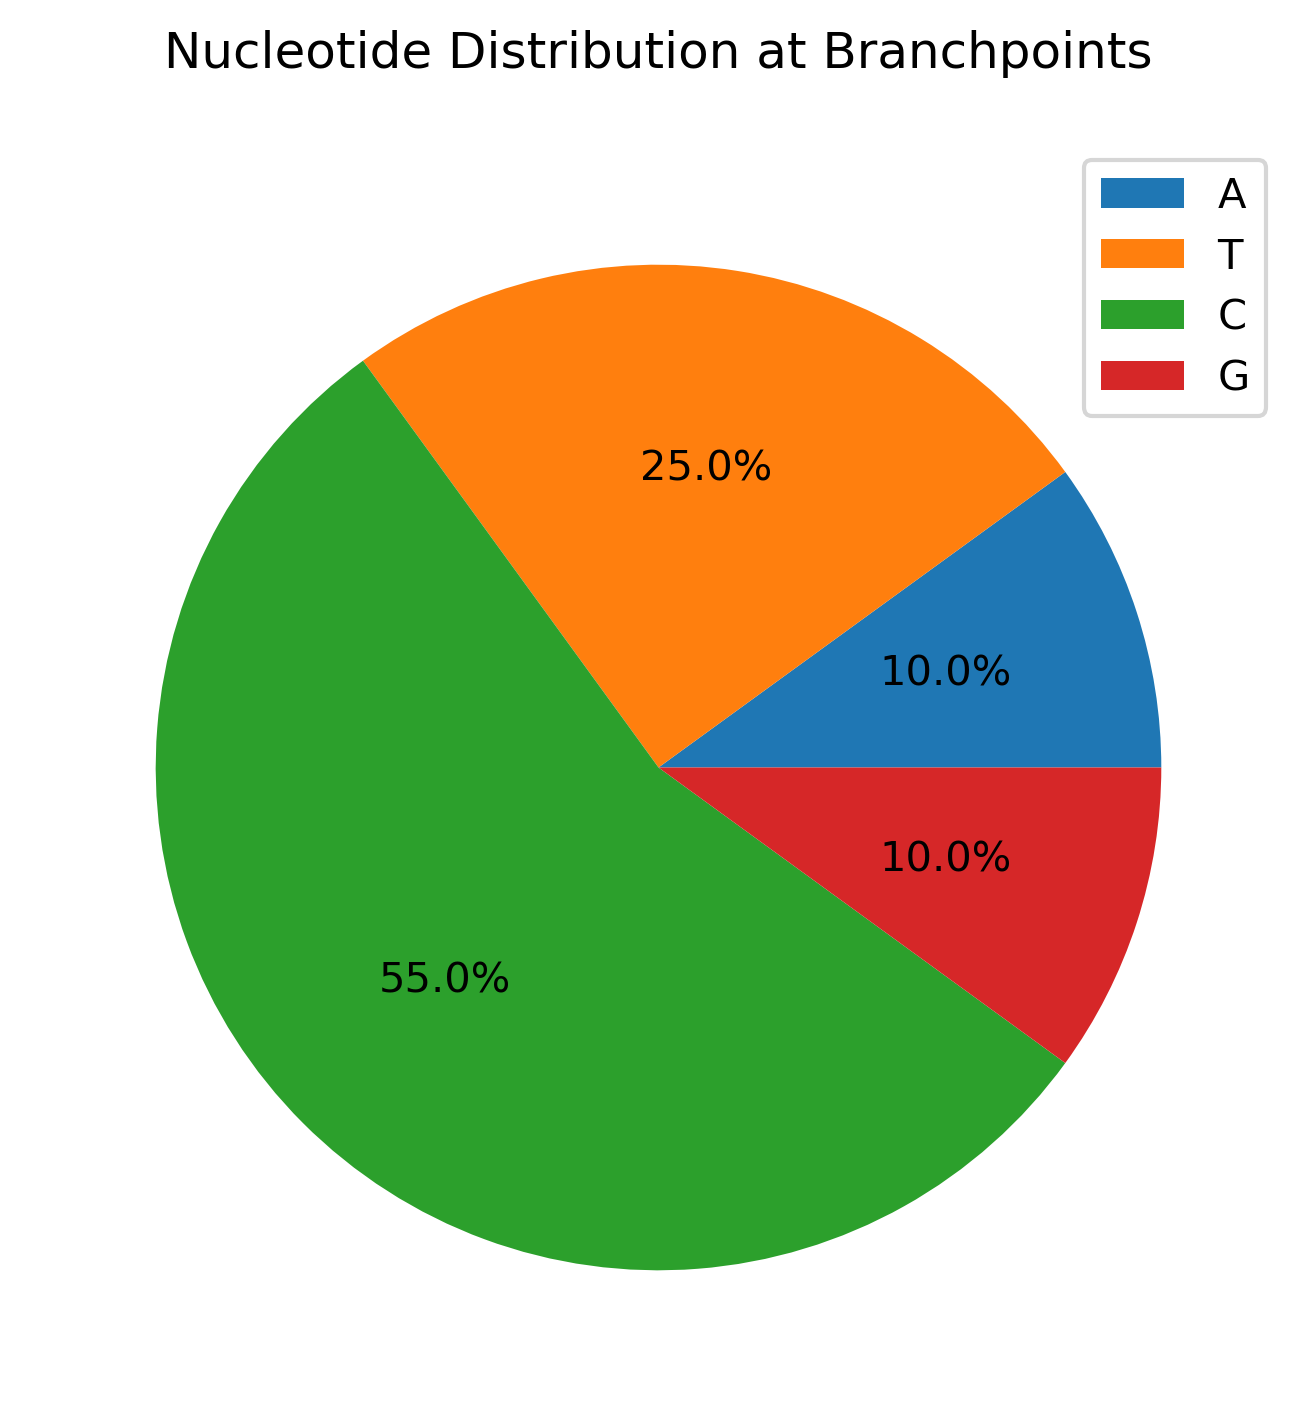

In [8]:
labels = ['A', 'T', 'C', 'G']
dist = [A, T, C, G]

fig, ax = plt.subplots(dpi=300)
ax.pie(dist, autopct='%1.1f%%')
plt.legend(labels)
plt.suptitle('Nucleotide Distribution at Branchpoints')
plt.tight_layout()
plt.show()

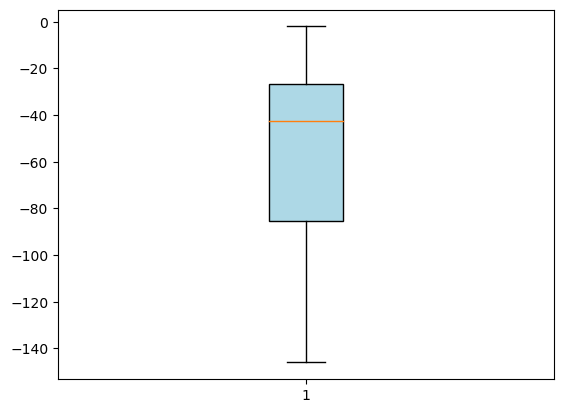

In [6]:
# Distance between branchpoint and 3' splice site 
bp_dist = np.array(reads_df['bp_dist_to_threep'], dtype='int')

fig, ax = plt.subplots(dpi=100)
ax.boxplot(bp_dist, patch_artist=True, boxprops=dict(facecolor = "lightblue"))

plt.show()

In [7]:
# # plot chromosomes

# # Read the text file
# with open('../demo_files/reference_files/mouse/mm39.gencode.basic.M32.threep_seq_lens.txt', 'r') as file:
#     lines = file.readlines()

# # Initialize lists to store chromosome data
# chromosomes = []
# positions = []
# directions = []

# # Parse the text file and extract chromosome information
# for line in lines:
#     data = line.strip().split('\t')
#     chromosome = data[0]
#     position = int(data[1])
#     direction = data[2]

#     chromosomes.append(chromosome)
#     positions.append(position)
#     directions.append(direction)

# # Plot the chromosomes
# plt.figure(figsize=(12, 6))
# for i in range(len(chromosomes)):
#     color = 'blue' if directions[i] == '-' else 'red'
#     plt.plot([chromosomes[i], chromosomes[i]], [positions[i],
#              positions[i] + 250], color=color, linewidth=2)
# plt.xlabel('Chromosome')
# plt.ylabel('Position')
# plt.title('Chromosome Plot')
# plt.legend(['End (-)', 'Start (+)'])
# plt.xticks(rotation=45)
# plt.tight_layout()